In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [104]:
# Read data from file
df = pd.read_csv("epa-sea-level.csv", usecols=["CSIRO Adjusted Sea Level", "Year"], index_col="Year")
df.head()

,CSIRO Adjusted Sea Level
Year,
1880,0.000000
1881,0.220472
1882,-0.440945
1883,-0.232283
1884,0.590551


In [105]:
df.tail()

,CSIRO Adjusted Sea Level
Year,
2009,8.586614
2010,8.901575
2011,8.964567
2012,9.326772
2013,8.980315


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 1880 to 2013
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CSIRO Adjusted Sea Level  134 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [107]:
df["predicted_data_since_1880"] = np.nan
df["predicted_data_since_2000"] = np.nan

for year in range(2014, 2051):
    df.loc[year] = 3 * [np.nan]
df.tail()

,CSIRO Adjusted Sea Level,predicted_data_since_1880,predicted_data_since_2000
Year,,,
2046,NaN,NaN,NaN
2047,NaN,NaN,NaN
2048,NaN,NaN,NaN
2049,NaN,NaN,NaN
2050,NaN,NaN,NaN


In [108]:
real_data = df.index <= 2013

since_1880_real = df[real_data]
predicted_data_since_1880 = linregress(x=since_1880_real.index, y=since_1880_real["CSIRO Adjusted Sea Level"])
df["predicted_data_since_1880"] = df.index * predicted_data_since_1880.slope + predicted_data_since_1880.intercept

since_2000_real = df[real_data & (df.index >= 2_000)]
predicted_data_since_2000 = linregress(x=since_2000_real.index, y=since_2000_real["CSIRO Adjusted Sea Level"])
df["predicted_data_since_2000"] = df.index * predicted_data_since_2000.slope + predicted_data_since_2000.intercept

print(predicted_data_since_1880)

df.tail(52)

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.0009692118713287149, intercept_stderr=1.8869433812425223)


,CSIRO Adjusted Sea Level,predicted_data_since_1880,predicted_data_since_2000
Year,,,
1999,7.011811,6.960181,6.894653
2000,7.062992,7.023226,7.061080
2001,7.287402,7.086271,7.227507
2002,7.381890,7.149315,7.393934
2003,7.759843,7.212360,7.560362
2004,7.740157,7.275404,7.726789
2005,7.744094,7.338449,7.893216
2006,7.917323,7.401494,8.059643
2007,7.996063,7.464538,8.226071


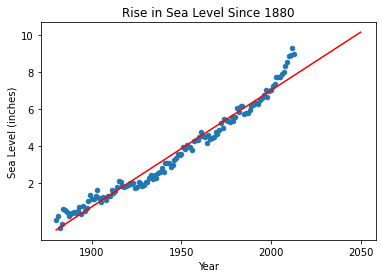

In [109]:
# Create scatter plot
since_1880_plot = df.reset_index().plot.scatter(x="Year", y="CSIRO Adjusted Sea Level")
since_1880_plot.set_xticks(list(range(1900, 2051, 50)))
since_1880_plot.set_yticks(list(range(2, 18, 2)))
since_1880_plot.set_ylabel("Sea Level (inches)")
since_1880_plot.set_title("Rise in Sea Level Since 1880")
plt.plot(df.index, df["predicted_data_since_1880"], 'r', label='fitted line')
plt.savefig('sea_level_plot_since_1880.png')

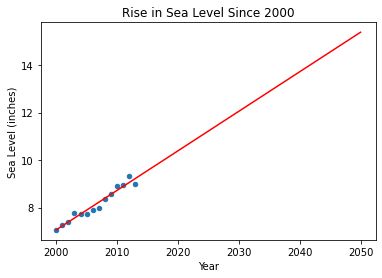

In [110]:
since_2000 = df[df.index >= 2_000]
since_2000_plot = since_2000.reset_index().plot.scatter(x="Year", y="CSIRO Adjusted Sea Level")
since_2000_plot.set_xticks(list(range(2000, 2051, 10)))
since_2000_plot.set_yticks(list(range(2, 18, 2)))
since_2000_plot.set_ylabel("Sea Level (inches)")
since_2000_plot.set_title("Rise in Sea Level Since 2000")
plt.plot(since_2000.index, since_2000["predicted_data_since_2000"], 'r', label='fitted line')
plt.savefig('sea_level_plot_since_2000.png')

In [111]:
# Create first line of best fit
print(predicted_data_since_1880.intercept, predicted_data_since_1880.intercept_stder)
# Create second line of best fit
print(predicted_data_since_2000.intercept, predicted_data_since_2000.intercept_stder)

# Add labels and title


# Save plot and return data for testing (DO NOT MODIFY)
plt.savefig('sea_level_plot.png')

AttributeError: 'LinregressResult' object has no attribute 'intercept_stder'